# - selenium의 chromedriver을 이용하여 웹브라우저 제어 및 조작

In [1]:
#셀레니움 -> 크롬드라이버를 이용해서 파이썬에서 크롬 웹브라우저 조작
#크롬드라이브 설치하여 C드라이브 밑에 파일 올리기
#크롬드라이브 주소 : https://sites.google.com/a/chromium.org/chromedriver/downloads
from selenium import webdriver

In [62]:
#webdriver.Chrome(크롬드라이버 경로 : 로컬경로) -> 자동화된 크롬브라우저를 만듦(제어가능)
driver = webdriver.Chrome("C://mychrome/chromedriver.exe")

In [3]:
#크롬드라이버를 이용하여 사이트 접속
url = "http://www.naver.com/"
driver.get(url)

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/e
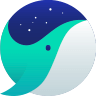
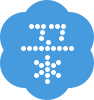

In [4]:
#페이지 정보 가져오기
html = driver.page_source
html

# - Beautifulsoup 복습

In [5]:
from bs4 import BeautifulSoup

In [6]:
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
        <div class = 'sale'>
            <p id='fruits1' class='fruits'>
                <span class = 'name'> 바나나 </span>
                <span class = 'price'> 3000원 </span>
                <span class = 'inventory'> 500개 </span>
                <span class = 'store'> 가나다상회 </span>
                <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
            </p>
        </div>
        <div class = 'prepare'>
            <p id='fruits2' class='fruits'>
                <span class ='name'> 파인애플 </span>
            </p>
        </div>
    </body>
</html>
'''

In [7]:
soup = BeautifulSoup(html, "html.parser")
html

"\n<html>\n    <head>\n    </head>\n    <body>\n        <h1> 우리동네시장</h1>\n        <div class = 'sale'>\n            <p id='fruits1' class='fruits'>\n                <span class = 'name'> 바나나 </span>\n                <span class = 'price'> 3000원 </span>\n                <span class = 'inventory'> 500개 </span>\n                <span class = 'store'> 가나다상회 </span>\n                <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n            </p>\n        </div>\n        <div class = 'prepare'>\n            <p id='fruits2' class='fruits'>\n                <span class ='name'> 파인애플 </span>\n            </p>\n        </div>\n    </body>\n</html>\n"

In [8]:
#태그 형식으로 태그 읽어오기
tagsSpan = soup.select("span") #length(tagsSpan) = 5
tagsP = soup.select("p") #length(tagsP) = 5

In [9]:
#아이디로 태그 읽어오기 : #기호 사용
soup.select("#fruits1")

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [10]:
#클래스명으로 태그 읽어오기 : .기호 사용
soup.select(".price")

[<span class="price"> 3000원 </span>]

In [11]:
soup.select("span.price")

[<span class="price"> 3000원 </span>]

In [12]:
soup.select("#fruits1 .name")

[<span class="name"> 바나나 </span>]

In [13]:
soup.select(".fruits")[0]

<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>

In [14]:
#'바나나'변수만 추출하기
soup.select("span.name")[0]
soup.select("#fruits1 span:nth-of-type(1)") 
# nth-child, nth-of-type : 분리가 되기 시작하는 root지점에서부터 태그명으로만 사용가능

[<span class="name"> 바나나 </span>]

In [15]:
tags = soup.select("a")
tag = tags[0]
print(tag.text)
print(tag['href'])

 홈페이지 
http://bit.ly/forPlaywithData


# - 멜론 인기차트 크롤링

In [16]:
#멜론
#https://www.melon.com/chart/index.htm

In [17]:
#1. 크롬드라이버 실행
from selenium import webdriver
driver = webdriver.Chrome("C://mychrome/chromedriver.exe")

In [18]:
#2. 대상 웹페이지 접속
url = "https://www.melon.com/chart/index.htm"
driver.get(url)

In [19]:
#3.html문서 다운로드 & Beautifulsoup으로 읽기
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;24H&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 실시간 차트부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="f13fc46b807bef984aa341efeb1adec8de12264c" name="naver-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="width=device-width" name="viewport"/>
<link href="/favicon.ico?2" id="favicon" rel="s

In [20]:
# 블러들인 웹페이지의 표(태그 : tr)를 가져오기
songs = soup.select("tr")
print(len(songs)) #첫번째 줄은 칼럼 타이틀 + top100

songs = soup.select("tr")[1:]
print(len(songs))

101
100


In [21]:
song = songs[0]
song.select("a")

[<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10462799');" title="다시 여기 바닷가">
 <img alt="다시 여기 바닷가 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/104/62/799/10462799_20200717150822_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>,
 <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('32790516');" title="다시 여기 바닷가 곡정보"><span class="none">곡정보</span></a>,
 <a href="javascript:melon.play.playSong('19030101',32790516);" title="다시 여기 바닷가 재생">다시 여기 바닷가</a>,
 <a href="javascript:melon.link.goArtistDetail('2879819');" title="싹쓰리 (유두래곤, 린다G, 비룡) - 페이지 이동">싹쓰리 (유두래곤, 린다G, 비룡)</a>,
 <a href="javascript:melon.link.goArtistDetail('2879819');" title="싹쓰리 (유두래곤, 린다G, 비룡) - 페이지 이동">싹쓰리 (유두래곤, 린다G, 비룡)</a>,
 <a href="javascript:melon.link.goAlbumDetail('10462799');" title="다시 여기 바닷가 - 페이지 이동">다시 여기 바닷가</a>]

In [22]:
song.select("span a")

[<a href="javascript:melon.play.playSong('19030101',32790516);" title="다시 여기 바닷가 재생">다시 여기 바닷가</a>,
 <a href="javascript:melon.link.goArtistDetail('2879819');" title="싹쓰리 (유두래곤, 린다G, 비룡) - 페이지 이동">싹쓰리 (유두래곤, 린다G, 비룡)</a>]

In [23]:
song.select("div")

[<div class="wrap t_right"><input class="input_check" name="input_check" title="다시 여기 바닷가 곡 선택" type="checkbox" value="32790516"/></div>,
 <div class="wrap">
 <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10462799');" title="다시 여기 바닷가">
 <img alt="다시 여기 바닷가 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/104/62/799/10462799_20200717150822_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>
 </div>,
 <div class="wrap">
 <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('32790516');" title="다시 여기 바닷가 곡정보"><span class="none">곡정보</span></a>
 </div>,
 <div class="wrap">
 <div class="wrap_song_info">
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('19030101',32790516);" title="다시 여기 바닷가 재생">다시 여기 바닷가</a>
 </span></div>
 <br/>
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.go

In [24]:
song.select("div.ellipsis.rank01 > span > a")[0].text #태그 클래스에 공백이 있을 때 공백대신 .을 찍음
#list로 묶여있는 것을 [0]을 해줌으로써 요소만 선택

'다시 여기 바닷가'

In [25]:
#다시 여기 바닷가의 가수를 출력
song.select("div.ellipsis.rank02 > span > a")[0].text

'싹쓰리 (유두래곤, 린다G, 비룡)'

In [26]:
#멜론 100위(songs) 순위 정보 모두 가져오기
musics = soup.select("tr > td:nth-child(4) > div div div.ellipsis.rank01 > span > a")
artists = soup.select("tr > td:nth-child(4) > div div div.ellipsis.rank02 > span > a")

for i, (music, artist) in enumerate(zip(musics, artists)):
    print(i+1, ":", music.text, "|", artist.text)

1 : 다시 여기 바닷가 | 싹쓰리 (유두래곤, 린다G, 비룡)
2 : 마리아 (Maria) | 화사 (Hwa Sa)
3 : 그 여름을 틀어줘 | 싹쓰리 (유두래곤, 린다G, 비룡)
4 : How You Like That | BLACKPINK
5 : Summer Hate (Feat. 비) | 지코 (ZICO)
6 : 여름 안에서 by 싹쓰리 (Feat. 황광희) | 싹쓰리 (유두래곤, 린다G, 비룡)
7 : Downtown Baby | 블루 (BLOO)
8 : 에잇(Prod.&Feat. SUGA of BTS) | 아이유
9 : LINDA (Feat. 윤미래) | 린다G
10 : 홀로 | 이하이
11 : 아로하 | 조정석
12 : 신난다 (Feat. 마마무) | 비룡
13 : Dolphin | 오마이걸
14 : 보라빛 밤 (pporappippam) | 선미
15 : 살짝 설렜어 (Nonstop) | 오마이걸
16 : 눈누난나 (NUNU NANA) | 제시 (Jessi)
17 : Dance Monkey | Tones And I
18 : 사랑하게 될 줄 알았어 | 전미도
19 : 어떻게 지내 (Prod. By VAN.C) | 오반
20 : Memories | Maroon 5
21 : Into the I-LAND | 아이유
22 : METEOR | 창모 (CHANGMO)
23 : Blueming | 아이유
24 : Don't Start Now | Dua Lipa
25 : 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야 | 장범준
26 : 아무노래 | 지코 (ZICO)
27 : 처음처럼 | 엠씨더맥스 (M.C the MAX)
28 : MORE & MORE | TWICE (트와이스)
29 : PLAY (Feat. 창모) | 청하
30 : 시작 | 가호 (Gaho)
31 : 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 | AKMU (악동뮤지션)
32 : Monster | 레드벨벳-아이린&슬기
33 : 좋은 사람 있으면 소개시켜줘 | 조이 (JOY)
34 : 2002 | An

# - Naver 이미지 크롤링

In [27]:
# 강아지:https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EA%B0%95%EC%95%84%EC%A7%80
# 고양이:https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EA%B3%A0%EC%96%91%EC%9D%B4
url = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EA%B0%95%EC%95%84%EC%A7%80"
driver.get(url)

[이미지크롤링]<br><br>
검색어 입력? 자동차<br>
크롤링할 데이터 개수: 30<br>
자동차 이미지 상위 30개가 다운로드 -> 특정 경로에 저장

In [28]:
from urllib.request import urlopen
from urllib.parse import quote_plus #한글을 유니코드로 변경해주기 위한 모듈과 함수
from bs4 import BeautifulSoup

In [49]:
baseURL = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query="
word = input("검색어를 입력하세요 : ") #ex)강아지, 고양이
num = int(input("크롤링할 데이터 개수 : "))
print(quote_plus(word))

검색어를 입력하세요 : 고양이
크롤링할 데이터 개수 : 20
%EA%B3%A0%EC%96%91%EC%9D%B4


In [51]:
url = baseURL+quote_plus(word)
html = urlopen(url) #html = driver.page_source

In [52]:
soup = BeautifulSoup(html, 'html.parser')
print(soup)

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="고양이 : 네이버 이미지검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'고양이'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'고양이'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>고양이 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_200716.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sst

In [156]:
img = soup.find_all(class_="_img") #class_ : 클래스 이름

In [54]:
# #for문만 이용하여 이미지 폴더에 저장
# n=1
# for i in img:
#     imgURL = i['data-source']
#     img = urlopen(imgURL).read()
    
#     #img폴더안에 down이라는 파일로 저장
#     f = open("img/down"+str(n)+".jpg", "wb")
#     f.write(img)
#     f.close()
#     n += 1
#     if num < n :
#         break

# with구문 사용하여 이미지 폴더에 저장
n =1
for i in img:
    imgURL = i["data-source"]
    with urlopen(imgURL) as f:
        with open("img/naver"+str(n)+".jpg", "wb") as na:
            img = f.read()
            na.write(img)
    n += 1
    if n>num:
        break
        

# - Instagram 키워드를 이용한 이미지 크롤링

In [65]:
import time

In [58]:
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/"+word
    return url

In [64]:
# 키워드 검색(제주도 맛집)
word = "제주도맛집"
url = insta_searching(word)
driver.get(url) #한글을 유니코드 형식으로 읽어주는 함수 : get

In [105]:
first = driver.find_element_by_css_selector("._9AhH0")
first.click()
time.sleep(2) #인스타그램 게시글 클릭했을 때 화면이 뜨는 시간을 기다림
# driver.page_source #불러온 페이지의 html을 읽는 코드

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

In [12]:
#인스타그램 접속하기
driver = webdriver.Chrome("C://mychrome/chromedriver.exe")
driver.get("https://www.instagram.com")
time.sleep(2)

In [97]:
#자동로그인
email = "" #id입력
password ="" #pw입력

# 로그인 정보 입력
driver.find_element_by_name('username').send_keys(email)
driver.find_element_by_name('password').send_keys(password)
driver.find_element_by_name('password').submit()


In [3]:
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/"+word
    return url

In [13]:
word = "제주도맛집"
url = insta_searching(word)
driver.get(url) #한글을 유니코드 형식으로 읽어주는 함수 : get

In [14]:
def select_first(driver):
    first = driver.find_element_by_css_selector("._9AhH0")
    first.click()
    time.sleep(2)
select_first(driver)

In [27]:
#게시글 다양한 정보 
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")
    
    # 게시글 읽기
    try:
        content = soup.select("div.C4VMK > span")[0].text 
    except:
        content = "" 

    ## content에서 해시태그만 가져오기
    hashtag =re.findall("#[\w,가-힣ㄱ-ㅎ]+", content) #[^\s]도 가능 : \s는 공백문자를 의미, ^은 not을 의미
    
    #게시된 날짜 가져오기
    date = soup.select("time._1o9PC.Nzb55")[0]['datetime'][:10]

    #좋아요 수 가져오기
    like = soup.select("div.Nm9Fw > button > span")[0].text
    
    #위치 정보 가져오기
    place = soup.select("div.M30cS")[0].text
        
    data = [content, date, like, place, hashtag]
#     print(data)
    return data
    
    
get_content(driver)

['.맛나는 음식보다만나는 음식이길 원해요..만남의 화려함보단작별의 그리움으로 남길 원하구요..그리운 엄마 밥처럼그런 곳으로 영글어갔으면 해요..‘ 월정리 갈비밥 ‘ 은 오늘도곧고 선한 마음으로 행복을 전해요🥰..#월정리갈비밥.월정리점 : 연중무휴서귀포점 : 화,수 휴무',
 '2020-08-09',
 '2,291',
 '',
 ['#월정리갈비밥']]

In [29]:
#다음 포스트로 이동하기
def moveNext(driver):
    right = driver.find_element_by_css_selector("a.coreSpriteRightPaginationArrow")
    right.click()
    time.sleep(2)
moveNext(driver)